In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx 
from lib.utils.functions import *
import matplotlib as plt

Load books

In [2]:
import os

# Get all books from data folder
all_books = [b for b in os.scandir('./data') if '.txt' in b.name]

In [3]:
book_doc = ner(all_books[:3])

In [4]:
displacy.render(book_doc[0:4000], style='ent', jupyter=True)

In [5]:
# get character
character_df = pd.read_csv('data/characters.csv')

In [6]:
# Remove brackets and text within brackets
import re
character_df['name'] = character_df['name'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
character_df['firstname'] = character_df['name'].apply(lambda x: x.split(" ", 1)[0])

In [7]:
character_df

,name,season,firstname
0,Will,1,Will
1,Waymar Royce,1,Waymar
2,Gared,1,Gared
3,Wildling girl,1,Wildling
4,White Walker,1,White
...,...,...,...
3057,Robin Arryn,8,Robin
3058,Yohn Royce,8,Yohn
3059,Bronn,8,Bronn
3060,Podrick Payne,8,Podrick


In [8]:
sent_entity_df = get_ne_list_per_sentence(book_doc)

In [9]:
sent_entity_df

,sentence,entities
0,"(This, edition, contains, the, complete, text,...",[]
1,"(NOT, ONE, WORD, HAS, BEEN, OMITTED, ., \n\n)",[ONE]
2,"(A, CLASH, OF, KINGS, \n\n, A, Bantam, Spectra...","[Bantam Spectra, February 1999, Bantam Spectra..."
3,"(All, rights, reserved, ., \n\n)",[]
4,"(Copyright, ©, 1999, by, George, R., R., Marti...","[1999, George R. R. Martin]"
...,...,...
15165,"(Without, siege, engines, there, was, no, way,...","[Casterly Rock, the Young Wolf]"
15166,"(Lords, Karstark, and, Glover, were, raiding, ...","[Lords Karstark, Glover, Lady Mormont, thousan..."
15167,"(Ser, Wendel, laughed, .)",[]
15168,"(“, Nothing, ’s, more, like, to, bring, a, Lan...",[]


Get only the rows containing character names as entities

In [10]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]

sent_entity_df_filtered.head(60)

,sentence,entities,character_entities
21,"(old, as, he, was, ,, Cressen, had, never, see...","[Cressen, half]",[Cressen]
42,"(Pylos, spoke, softly, ,, as, if, loath, to, d...","[Pylos, Cressen]",[Cressen]
50,"(In, his, youth, ,, Cressen, had, walked, bris...",[Cressen],[Cressen]
53,"(to, help, him, in, his, labors, ,, it, was, s...",[Cressen],[Cressen]
68,"(Cressen, said, ., \n\n)",[Cressen],[Cressen]
69,"(“, It, ’s, me, and, Patches, ,, Maester, ., ”)",[Maester],[Maester]
75,"(“, Indeed, you, may, ,, ”, Cressen, answered, .)",[Cressen],[Cressen]
78,"(Her, name, was, Shireen, .)",[Shireen],[Shireen]
86,"(A, maester, must, go, where, he, is, sent, ,,...","[Cressen, twelve years past]",[Cressen]
99,"(Cressen, beckoned, her, closer, .)",[Cressen],[Cressen]


In [11]:
# Get first name of character entity
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split(" ", 1)[0]
                                                                                                               for item in x])

/var/folders/cw/yw92mf852pl_1z7n8hxzfm740000gn/T/ipykernel_3574/3663637372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split(" ", 1)[0]


In [12]:
relationship_df = create_relationships(sent_entity_df_filtered, 5)

In [35]:
sorted_relationship_df = relationship_df.sort_values(by='value', ascending=False)
sorted_relationship_df

,source,target,value
219,Jon,Sam,217
42,Arya,Yoren,171
341,Arya,Gendry,169
7,Davos,Stannis,159
60,Joffrey,Sansa,141
...,...,...,...
735,Jorah,Qartheen,1
717,Ilyn,Pycelle,1
714,Shagga,Varys,1
712,Pycelle,Stark,1


In [36]:
sorted_relationship_df = sorted_relationship_df.iloc[:-500]
sorted_relationship_df

,source,target,value
219,Jon,Sam,217
42,Arya,Yoren,171
341,Arya,Gendry,169
7,Davos,Stannis,159
60,Joffrey,Sansa,141
...,...,...,...
517,Gyles,Hallyne,6
518,Hallyne,Lancel,6
546,Beric,Jeyne,6
543,Myrcella,Varys,6


graph analysis and visualization

In [37]:
G = nx.from_pandas_edgelist(sorted_relationship_df,
                            source="source",
                            target="target",
                            edge_attr="value",
                            create_using= nx.Graph())

AttributeError: module 'matplotlib' has no attribute 'show'

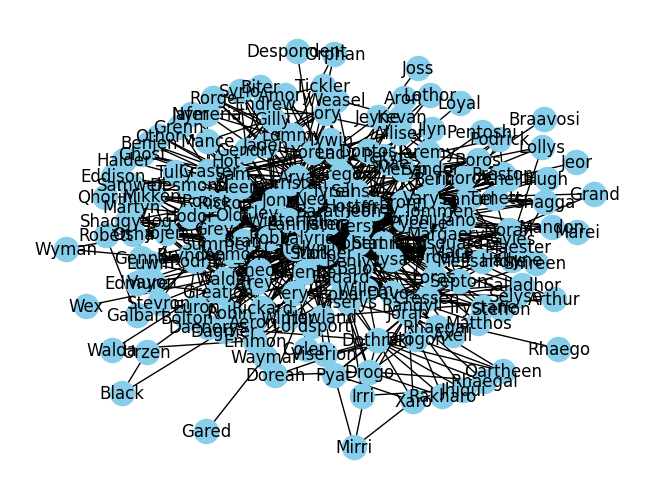

In [17]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color="skyblue", edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [38]:
from pyvis.network import Network
net = Network(notebook=True, width="2000px", height="1400px", bgcolor="#222222", font_color="white")
net.repulsion()

node_degree = dict(G.degree)

# Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


community detection

In [39]:
import community as community_louvain

In [40]:
communities = community_louvain.best_partition(G)

In [41]:
nx.set_node_attributes(G, communities, 'group')

In [42]:
comm_net = Network(notebook=True, width="1500px", height="1050px", bgcolor="#222222", font_color="white")
comm_net.repulsion()
comm_net.from_nx(G)
comm_net.show("communities_witcher.html")

communities_witcher.html


In [43]:
# degree centrality
degree_dict = nx.degree_centrality(G)

<Axes: >

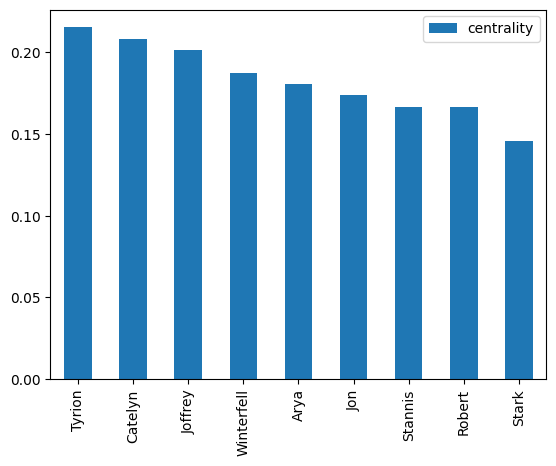

In [44]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<Axes: >

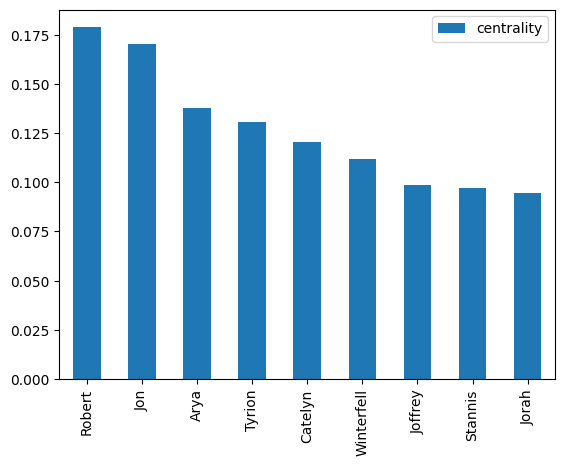

In [45]:
between_dict = nx.betweenness_centrality(G)
degree_df = pd.DataFrame.from_dict(between_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<Axes: >

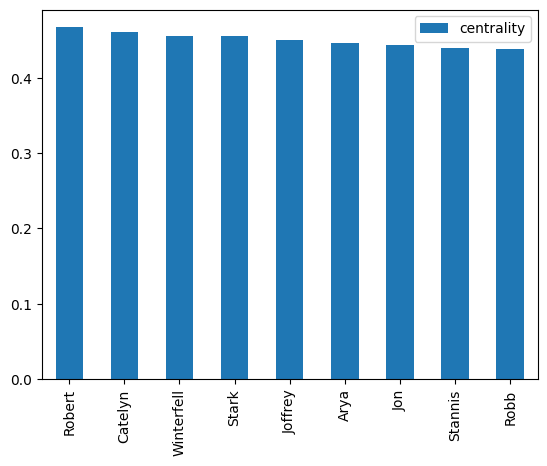

In [46]:
closeness_dict = nx.closeness_centrality(G)
degree_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')